In [1]:
# Import necessary libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

%matplotlib inline

In [2]:
from google.cloud import bigquery

# Create client object
client = bigquery.Client()

# Create dataset reference
dataset_ref = client.dataset('google_analytics_sample', project='bigquery-public-data')

# Retrieve dataset from reference
dataset = client.get_dataset(dataset_ref)

Using Kaggle's public dataset BigQuery integration.


In [3]:
# Create table reference
table_ref_20160801 = dataset_ref.table('ga_sessions_20160801')

# Retrieve table from reference
table_20160801 = client.get_table(table_ref_20160801)

# View columns
client.list_rows(table_20160801, max_results=5).to_dataframe()

,visitorId,visitNumber,visitId,visitStartTime,date,totals,trafficSource,device,geoNetwork,customDimensions,hits,fullVisitorId,userId,channelGrouping,socialEngagementType
0,NaN,1,1470046245,1470046245,20160801,"{'visits': 1, 'hits': 24, 'pageviews': 17, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Firefox', 'browserVersion': 'not ...","{'continent': 'Europe', 'subContinent': 'Weste...","[{'index': 4, 'value': 'EMEA'}]","[{'hitNumber': 1, 'time': 0, 'hour': 3, 'minut...",895954260133011192,None,Organic Search,Not Socially Engaged
1,NaN,1,1470084717,1470084717,20160801,"{'visits': 1, 'hits': 24, 'pageviews': 18, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Internet Explorer', 'browserVersi...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 13, 'minu...",0288478011259077136,None,Direct,Not Socially Engaged
2,NaN,3,1470078988,1470078988,20160801,"{'visits': 1, 'hits': 27, 'pageviews': 17, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Safari', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 12, 'minu...",6440789996634275026,None,Organic Search,Not Socially Engaged
3,NaN,4,1470075581,1470075581,20160801,"{'visits': 1, 'hits': 27, 'pageviews': 19, 'ti...","{'referralPath': '/', 'campaign': '(not set)',...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 11, 'minu...",8520115029387302083,None,Referral,Not Socially Engaged
4,NaN,30,1470099026,1470099026,20160801,"{'visits': 1, 'hits': 27, 'pageviews': 17, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 17, 'minu...",6792260745822342947,None,Organic Search,Not Socially Engaged


In [4]:
def format_schema_field(schema_field, indent=0):
    indent_str = "  " * indent
    field_info = f"{indent_str}{schema_field.name} ({schema_field.field_type})"
    
    if schema_field.mode != "NULLABLE":
        field_info += f" - {schema_field.mode}"
    
    if schema_field.description:
        field_info += f" - {schema_field.description}"
    
    nested_indent = indent + 2
    if schema_field.field_type == "RECORD":
        for sub_field in schema_field.fields:
            field_info += "\n" + format_schema_field(sub_field, nested_indent)
    
    return field_info

# Display schemas
print("SCHEMA field for the 'totals' column:\n")
print(format_schema_field(table_20160801.schema[5]))
print()

print("\nSCHEMA field for the 'trafficSource' column:\n")
print(format_schema_field(table_20160801.schema[6]))
print()

print("\nSCHEMA field for the 'device' column:\n")
print(format_schema_field(table_20160801.schema[7]))
print()

print("\nSCHEMA field for the 'geoNetwork' column:\n")
print(format_schema_field(table_20160801.schema[8]))
print()

print("\nSCHEMA field for the 'customDimensions' column:\n")
print(format_schema_field(table_20160801.schema[9]))
print()

print("\nSCHEMA field for the 'hits' column:\n")
print(format_schema_field(table_20160801.schema[10]))

SCHEMA field for the 'totals' column:

totals (RECORD)
    visits (INTEGER)
    hits (INTEGER)
    pageviews (INTEGER)
    timeOnSite (INTEGER)
    bounces (INTEGER)
    transactions (INTEGER)
    transactionRevenue (INTEGER)
    newVisits (INTEGER)
    screenviews (INTEGER)
    uniqueScreenviews (INTEGER)
    timeOnScreen (INTEGER)
    totalTransactionRevenue (INTEGER)
    sessionQualityDim (INTEGER)


SCHEMA field for the 'trafficSource' column:

trafficSource (RECORD)
    referralPath (STRING)
    campaign (STRING)
    source (STRING)
    medium (STRING)
    keyword (STRING)
    adContent (STRING)
    adwordsClickInfo (RECORD)
        campaignId (INTEGER)
        adGroupId (INTEGER)
        creativeId (INTEGER)
        criteriaId (INTEGER)
        page (INTEGER)
        slot (STRING)
        criteriaParameters (STRING)
        gclId (STRING)
        customerId (INTEGER)
        adNetworkType (STRING)
        targetingCriteria (RECORD)
            boomUserlistId (INTEGER)
        isV

In [5]:
query = """
    SELECT 
    CAST(fullVisitorId AS STRING) AS fullVisitorId,              -- Unique visitor ID
    visitNumber,                                                 -- The session number for this user
    visitId,
    TIMESTAMP_SECONDS(visitStartTime) AS session_start_time,     -- Start time of the session in timestamp format
    PARSE_DATE('%Y%m%d', date) AS session_date,                  -- Date of the session in YYYYMMDD format
    hits.page.pagePath AS page_path,                             -- Path of the page visited
    hits.page.pageTitle AS page_title,                           -- Title of the page hit
    hits.eventInfo.eventCategory AS event_category,              -- Category of the event (e.g., Video, Button Click)
    hits.eventInfo.eventAction AS event_action,                  -- Action of the event (e.g., Play, Click)
    hits.eventInfo.eventLabel AS event_label,                    -- Label of the event (e.g., Video Name, Button Name)
    hits.type AS hit_type,                                       -- Type of hit (PAGE, EVENT, TRANSACTION, etc.)
    totals.hits AS total_hits,                                   -- Total number of hits within the session
    totals.pageviews AS total_pageviews,                         -- Total number of pageviews within the session
    totals.screenviews AS total_screenviews,                     -- Total number of screenviews within the session
    totals.timeOnScreen AS total_time_on_screen,                 -- Total time on screen in seconds
    totals.timeOnSite AS total_time_on_site,                     -- Total time of the session expressed in seconds
    totals.bounces AS total_bounces,                             -- Total bounces (1 for a bounced session, otherwise null)
    totals.transactions AS total_transactions,                   -- Total number of ecommerce transactions within the session
    totals.totalTransactionRevenue AS total_transaction_revenue, -- Total transaction revenue in micro-units
    trafficSource.source AS traffic_source,                      -- Source of the traffic (e.g., google, direct, referral)
    trafficSource.medium AS traffic_medium,                      -- Medium of the traffic (e.g., organic, CPC, referral)
    device.deviceCategory AS device_category,                    -- The category of the device (e.g., desktop, mobile)
    geoNetwork.country AS user_country,                          -- Country from which the user accessed the site
    geoNetwork.region AS user_region,                            -- Region from which the user accessed the site
    geoNetwork.city AS user_city                                 -- City from which the user accessed the site
FROM 
    `bigquery-public-data.google_analytics_sample.ga_sessions_*`, UNNEST(hits) AS hits
WHERE 
    _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'
    AND hits.type IN ('PAGE', 'EVENT')                           -- Filter for relevant hit types
"""
df_raw = client.query(query).result().to_dataframe()
df_raw.head(10)

,fullVisitorId,visitNumber,visitId,session_start_time,session_date,page_path,page_title,event_category,event_action,event_label,...,total_time_on_site,total_bounces,total_transactions,total_transaction_revenue,traffic_source,traffic_medium,device_category,user_country,user_region,user_city
0,2027467578103520019,1,1494700952,2017-05-13 18:42:32+00:00,2017-05-13,/google+redesign/office/notebooks++journals,Notebooks & Journals | Office | Google Merchan...,None,None,None,...,506.0,NaN,NaN,NaN,youtube.com,referral,desktop,India,not available in demo dataset,not available in demo dataset
1,5897909545211791819,1,1494704494,2017-05-13 19:41:34+00:00,2017-05-13,/google+redesign/bags/backpacks/home,Backpacks | Bags | Google Merchandise Store,Enhanced Ecommerce,Quickview Click,Google Laptop Backpack,...,437.0,NaN,NaN,NaN,google,organic,desktop,Greece,not available in demo dataset,not available in demo dataset
2,528143874715730239,1,1494699117,2017-05-13 18:11:57+00:00,2017-05-13,/google+redesign/electronics/quickview,Electronics | Google Merchandise Store,None,None,None,...,617.0,NaN,NaN,NaN,google,organic,desktop,United States,New York,New York
3,528143874715730239,1,1494699117,2017-05-13 18:11:57+00:00,2017-05-13,/google+redesign/electronics,Electronics | Google Merchandise Store,Enhanced Ecommerce,Quickview Click,Google Tube Power Bank,...,617.0,NaN,NaN,NaN,google,organic,desktop,United States,New York,New York
4,528143874715730239,1,1494699117,2017-05-13 18:11:57+00:00,2017-05-13,/google+redesign/electronics/quickview,Electronics | Google Merchandise Store,None,None,None,...,617.0,NaN,NaN,NaN,google,organic,desktop,United States,New York,New York
5,4716076955789492487,1,1494715314,2017-05-13 22:41:54+00:00,2017-05-13,/basket.html,Shopping Cart,Enhanced Ecommerce,Remove from Cart,None,...,242.0,NaN,NaN,NaN,google,organic,desktop,United States,New York,New York
6,7738187641176280967,1,1494730635,2017-05-14 02:57:15+00:00,2017-05-13,/home,Home,None,None,None,...,252.0,NaN,NaN,NaN,google,organic,mobile,United States,New York,New York
7,7738187641176280967,1,1494730635,2017-05-14 02:57:15+00:00,2017-05-13,/home,Home,None,None,None,...,252.0,NaN,NaN,NaN,google,organic,mobile,United States,New York,New York
8,7054908618767753222,8,1494692675,2017-05-13 16:24:35+00:00,2017-05-13,/google+redesign/apparel/womens,Women's Apparel | Google Merchandise Store,None,None,None,...,208.0,NaN,NaN,NaN,(direct),(none),desktop,United States,California,San Francisco
9,2988253927239028546,2,1494685429,2017-05-13 14:23:49+00:00,2017-05-13,/google+redesign/shop+by+brand/youtube,YouTube | Shop by Brand | Google Merchandise S...,Enhanced Ecommerce,Quickview Click,YouTube RFID Journal,...,95.0,NaN,NaN,NaN,google,organic,desktop,Bulgaria,not available in demo dataset,not available in demo dataset


In [6]:
df = df_raw.copy()

In [7]:
# Create a unique identifier by combining fullVisitorId and visitId
df['unique_id'] = df['fullVisitorId'].astype(str) + "_" + df['visitId'].astype(str)


In [8]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [9]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

In [10]:


def count_distinct_values(df):
    """
    Count distinct values in each categorical column of the DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.
    
    Returns:
    pd.DataFrame: A DataFrame showing the distinct count of values for each categorical column.
    """
    # Select categorical columns
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    
    # Create a dictionary to store the distinct counts
    distinct_counts = {col: df[col].nunique() for col in categorical_columns}
    
    # Convert the dictionary to a DataFrame for better visualization
    distinct_counts_df = pd.DataFrame(list(distinct_counts.items()), columns=['Column', 'Distinct_Count'])
    
    return distinct_counts_df

distinct_values_df = count_distinct_values(df)
print(distinct_values_df)


             Column  Distinct_Count
0     fullVisitorId          714167
1      session_date             366
2         page_path            2571
3        page_title            1677
4    event_category               2
5      event_action               6
6       event_label             492
7          hit_type               2
8    traffic_source             275
9    traffic_medium               7
10  device_category               3
11     user_country             222
12      user_region             376
13        user_city             649
14        unique_id          902755


In [11]:


def print_top_categories(df, top_n=3):
    """
    Automatically identify categorical columns and print the top N categories 
    in each categorical variable based on their occurrence.

    Parameters:
    - df: DataFrame containing the data
    - top_n: Number of top categories to print (default is 3)
    """
    # Automatically identify categorical columns
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns

    for column in categorical_columns:
        print(f"\nTop {top_n} categories in '{column}':")
        top_categories = df[column].value_counts().head(top_n)
        print(top_categories)

print_top_categories(df)



Top 3 categories in 'fullVisitorId':
fullVisitorId
1957458976293878100    4995
0824839726118485274    3378
1856749147915772585    2174
Name: count, dtype: int64

Top 3 categories in 'session_date':
session_date
2016-11-28    21782
2016-10-04    20967
2016-08-12    20018
Name: count, dtype: int64

Top 3 categories in 'page_path':
page_path
/home                                     1041794
/basket.html                               228137
/google+redesign/shop+by+brand/youtube     182407
Name: count, dtype: int64

Top 3 categories in 'page_title':
page_title
Home                   691072
Google Online Store    397173
Shopping Cart          228016
Name: count, dtype: int64

Top 3 categories in 'event_category':
event_category
Enhanced Ecommerce    637402
Contact Us              6348
Name: count, dtype: int64

Top 3 categories in 'event_action':
event_action
Quickview Click    359494
Add to Cart        121337
Product Click       86198
Name: count, dtype: int64

Top 3 categories in 'event_

In [12]:
def fillna_numerical_with_zero(df):
    """
    Fill NaN values with 0 in all numerical columns of the DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to process.
    
    Returns:
    pd.DataFrame: The DataFrame with NaN values filled with 0 in numerical columns.
    """
    # Select numerical columns
    numerical_cols = df.select_dtypes(include=['number']).columns
    
    # Fill NaN values with 0 in numerical columns
    df[numerical_cols] = df[numerical_cols].fillna(0)
    
    return df


df = fillna_numerical_with_zero(df)

In [13]:
def five_number_summary(df):
    """
    Provide a five-number summary (minimum, 25th percentile, median, 75th percentile, maximum)
    for each numerical column in the DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to process.
    
    Returns:
    pd.DataFrame: A DataFrame containing the five-number summary for each numerical column.
    """
    # Select numerical columns
    numerical_cols = df.select_dtypes(include=['number']).columns
    
    # Calculate five-number summary
    summary = {}
    for col in numerical_cols:
        summary[col] = {
            'Min': df[col].min(),
            '25th Percentile': df[col].quantile(0.25),
            'Median': df[col].median(),
            '75th Percentile': df[col].quantile(0.75),
            'Max': df[col].max()
        }
    
    return pd.DataFrame(summary).T

summary_df = five_number_summary(df)
print(summary_df)


                                    Min  25th Percentile        Median  \
visitNumber                1.000000e+00     1.000000e+00  1.000000e+00   
visitId                    1.470035e+09     1.476384e+09  1.483162e+09   
total_hits                 1.000000e+00     4.000000e+00  1.200000e+01   
total_pageviews            0.000000e+00     4.000000e+00  1.000000e+01   
total_screenviews          0.000000e+00     0.000000e+00  0.000000e+00   
total_time_on_screen       0.000000e+00     0.000000e+00  0.000000e+00   
total_time_on_site         0.000000e+00     6.200000e+01  2.730000e+02   
total_bounces              0.000000e+00     0.000000e+00  0.000000e+00   
total_transactions         0.000000e+00     0.000000e+00  0.000000e+00   
total_transaction_revenue  0.000000e+00     0.000000e+00  0.000000e+00   

                           75th Percentile           Max  
visitNumber                   2.000000e+00  3.950000e+02  
visitId                       1.492530e+09  1.501657e+09  
total_hi

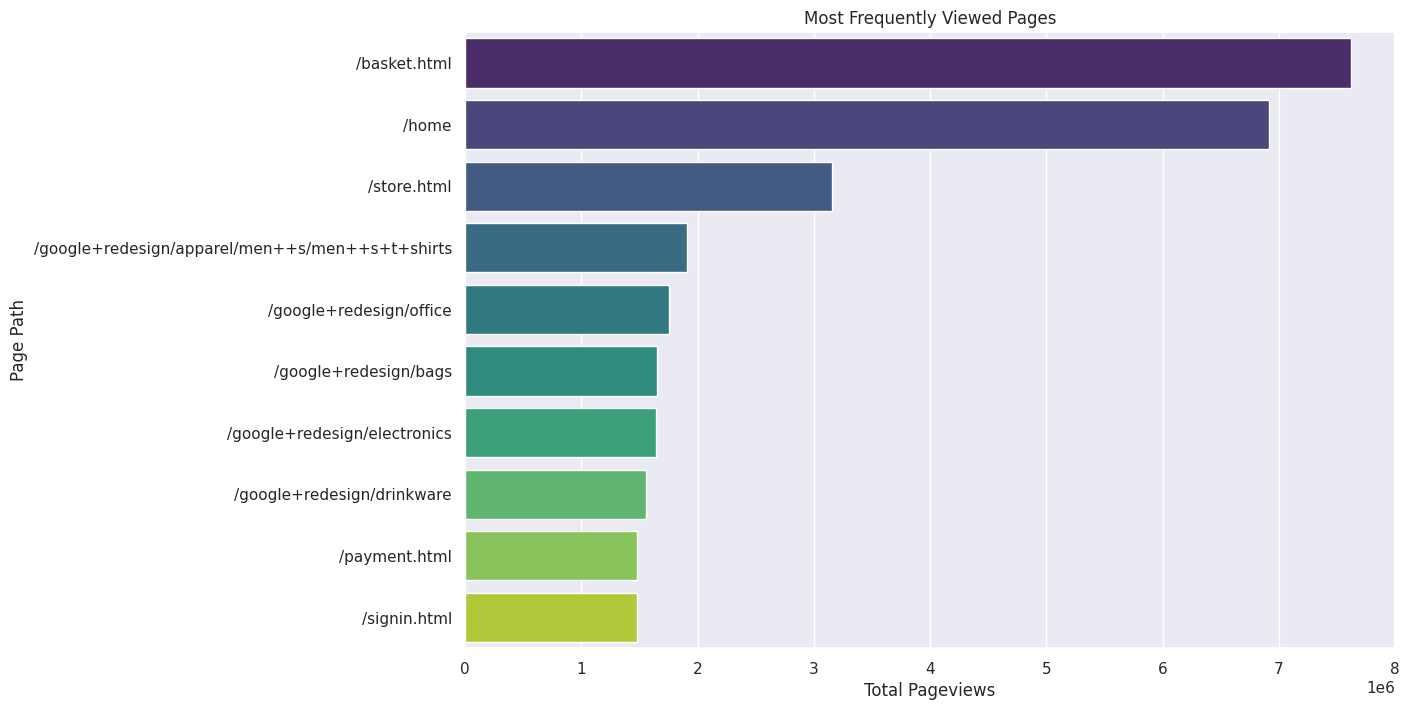

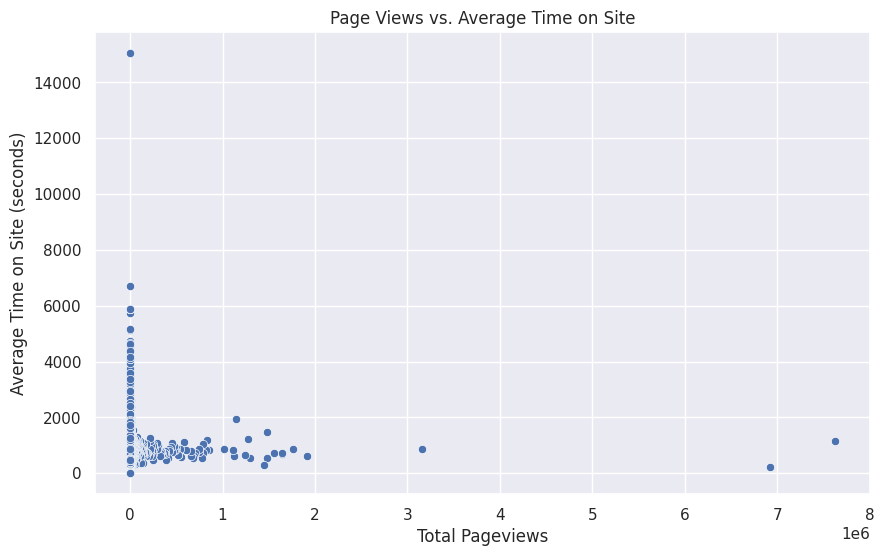

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_page_views_and_engagement(df):
    """
    Visualize the most frequently viewed pages and their correlation with user engagement.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing session data.
    
    Returns:
    None
    """
    # Aggregate page views and total time on site by page path
    page_stats = df.groupby('page_path').agg(
        total_pageviews=('total_pageviews', 'sum'),
        total_time_on_site=('total_time_on_site', 'mean')
    ).reset_index()
    
    # Sort by total pageviews
    page_stats = page_stats.sort_values(by='total_pageviews', ascending=False)
    
    # Plot the most frequently viewed pages
    plt.figure(figsize=(12, 8))
    sns.barplot(x='total_pageviews', y='page_path', data=page_stats.head(10), palette='viridis')
    plt.title('Most Frequently Viewed Pages')
    plt.xlabel('Total Pageviews')
    plt.ylabel('Page Path')
    plt.show()
    
    # Plot correlation between page views and average time on site
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='total_pageviews', y='total_time_on_site', data=page_stats)
    plt.title('Page Views vs. Average Time on Site')
    plt.xlabel('Total Pageviews')
    plt.ylabel('Average Time on Site (seconds)')
    plt.show()


visualize_page_views_and_engagement(df)


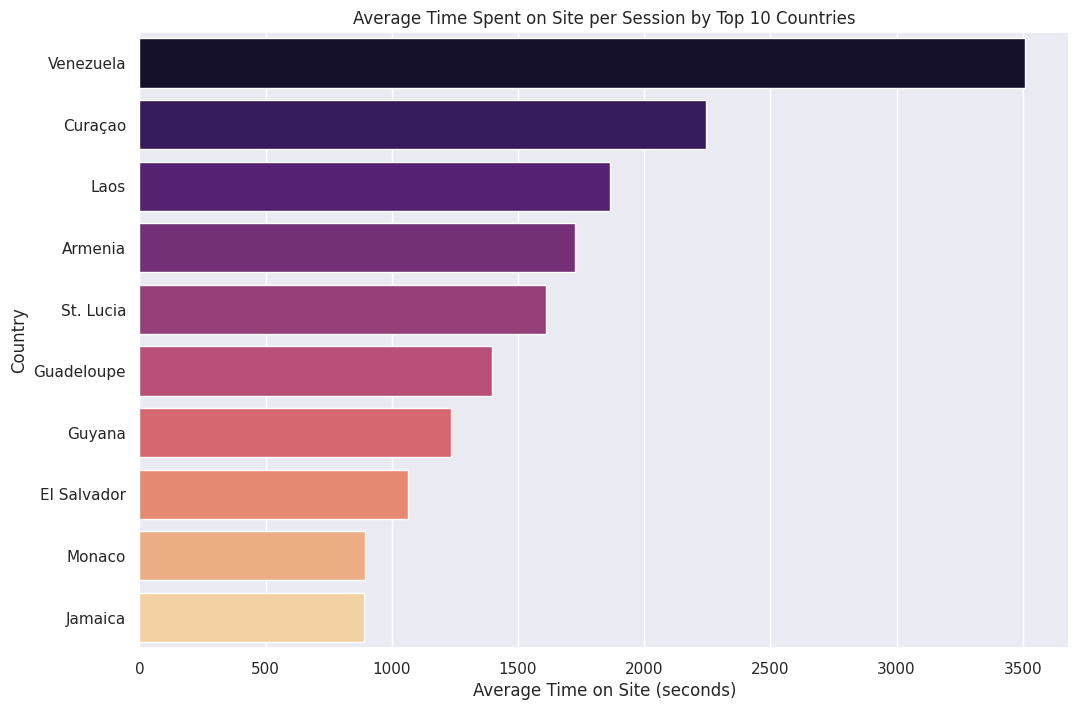

In [15]:
def visualize_avg_time_per_session(df, top_n=10):
    """
    Determine and visualize the average time spent on site per session and user segments for the top n countries.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing session data.
    top_n (int): The number of top countries to visualize.
    
    Returns:
    None
    """
    # Calculate average time spent on site per session by country
    avg_time_on_site = df.groupby('user_country')['total_time_on_site'].mean().reset_index()
    avg_time_on_site = avg_time_on_site.sort_values(by='total_time_on_site', ascending=False)
    
    # Select top n countries
    top_avg_time_on_site = avg_time_on_site.head(top_n)
    
    # Plot average time on site by user country
    plt.figure(figsize=(12, 8))
    sns.barplot(x='total_time_on_site', y='user_country', data=top_avg_time_on_site, palette='magma')
    plt.title(f'Average Time Spent on Site per Session by Top {top_n} Countries')
    plt.xlabel('Average Time on Site (seconds)')
    plt.ylabel('Country')
    plt.show()

visualize_avg_time_per_session(df, top_n=10)

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from current font.

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 21551 (\N{CJK UNIFIED IDEOGRAPH-542F}) missing from current font.

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 29992 (\N{CJK UNIFIED IDEOGRAPH-7528}) missing from current font.

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 23631 (\N{CJK UNIFIED IDEOGRAPH-5C4F}) missing from current font.

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 24149 (\N{CJK UNIFIED IDEOGRAPH-5E55}) missing from current font.

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 38405 (\N{CJK UNIFIED IDEOGRAPH-9605}) missing from current font.

/opt/conda/lib/python3.10/site-packages/IPytho

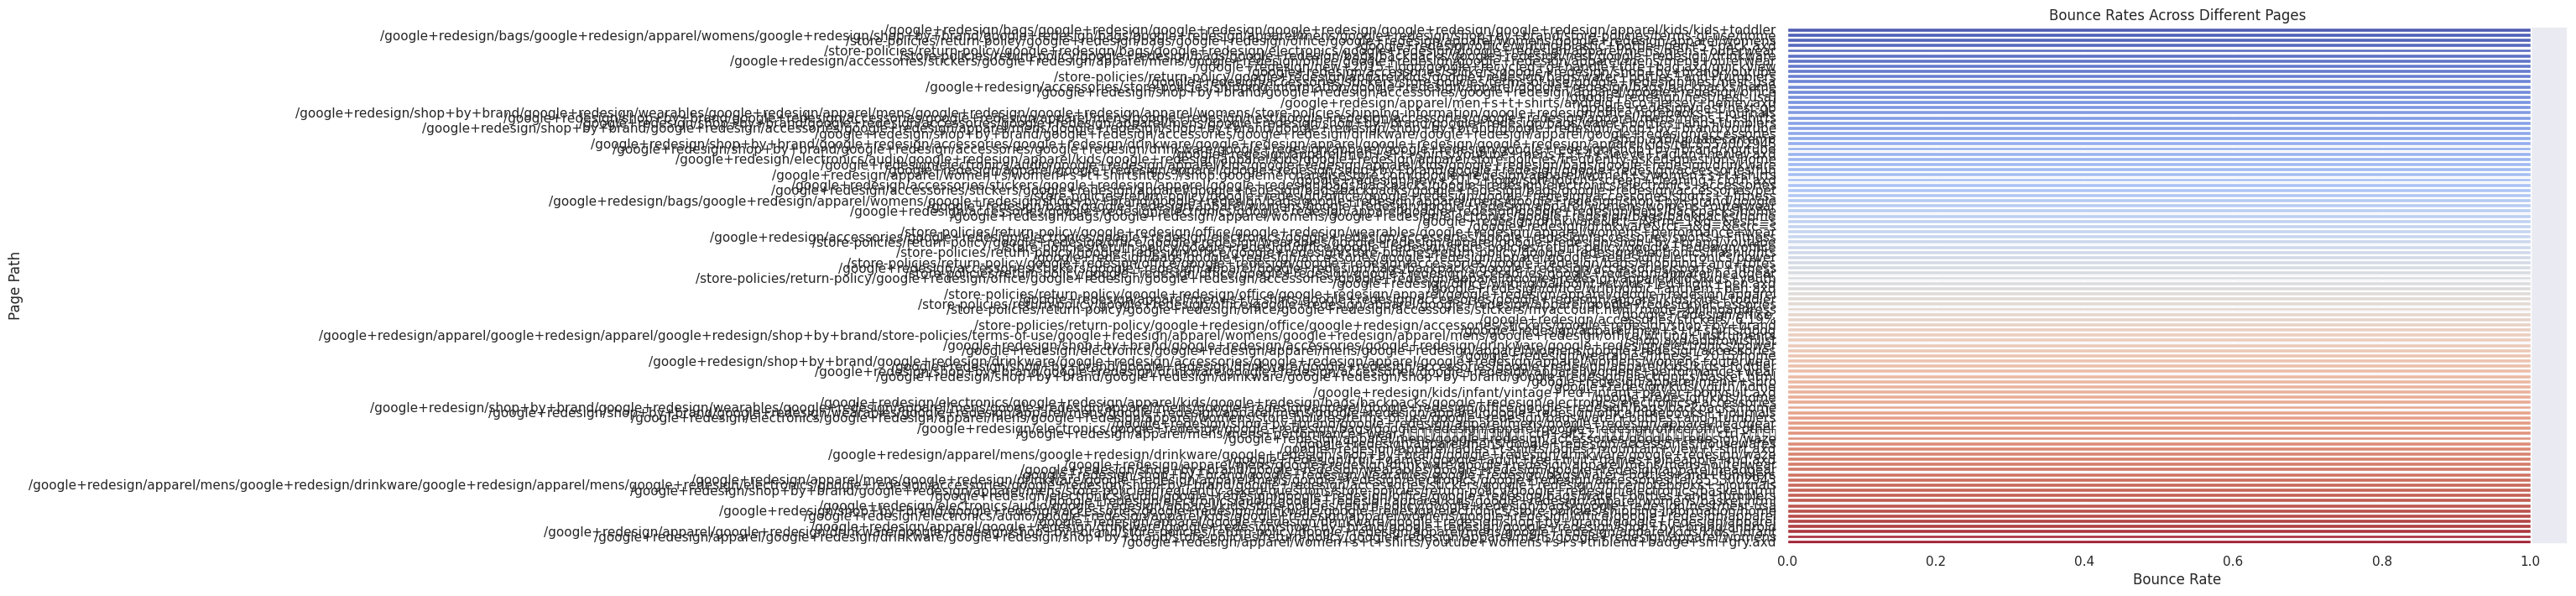

In [32]:
def visualize_bounce_rates(df):
    """
    Analyze and visualize bounce rates across different pages.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing session data.
    
    Returns:
    None
    """
    # Calculate bounce rate per page
    bounce_rates = df.groupby('page_path').agg(
        bounces=('total_bounces', 'mean'),
        total_pageviews=('total_pageviews', 'sum')
    ).reset_index()
    
    bounce_rates['bounce_rate'] = bounce_rates['bounces'] / bounce_rates['total_pageviews']
    
    # Sort by bounce rate
    bounce_rates = bounce_rates.sort_values(by='bounce_rate', ascending=False)
    
    # Plot bounce rates
    plt.figure(figsize=(12, 8))
    sns.barplot(x='bounce_rate', y='page_path', data=bounce_rates.head(100), palette='coolwarm')
    plt.title('Bounce Rates Across Different Pages')
    plt.xlabel('Bounce Rate')
    plt.ylabel('Page Path')
    plt.show()


visualize_bounce_rates(df)


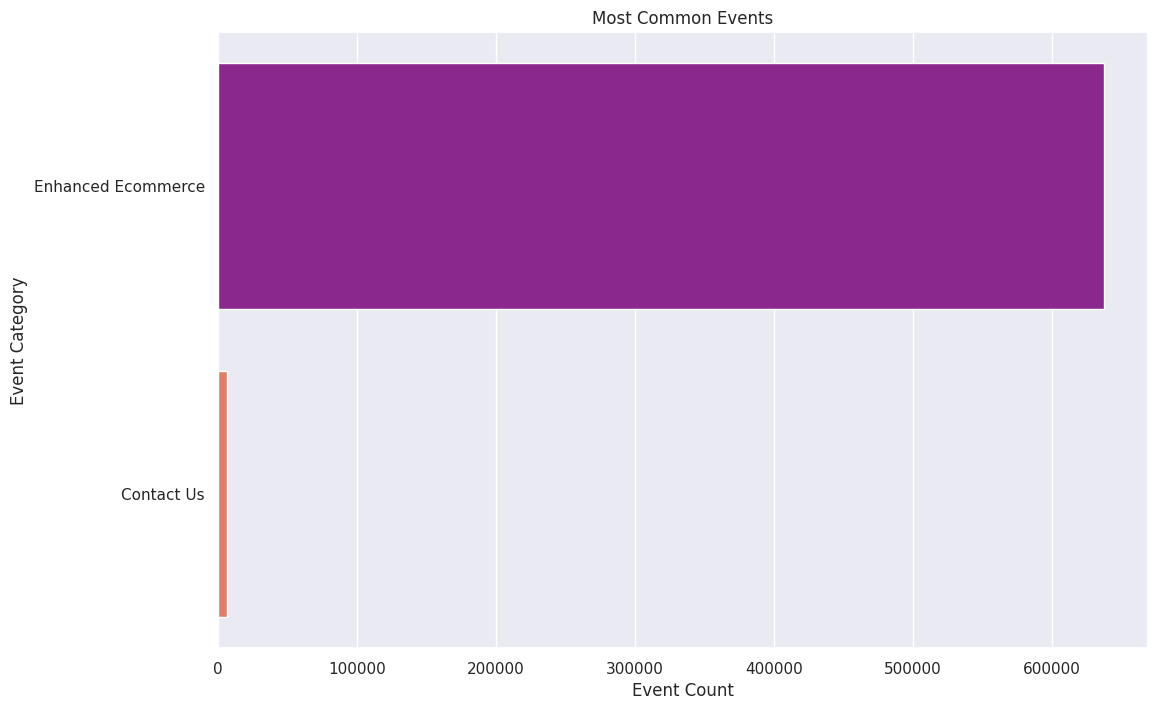

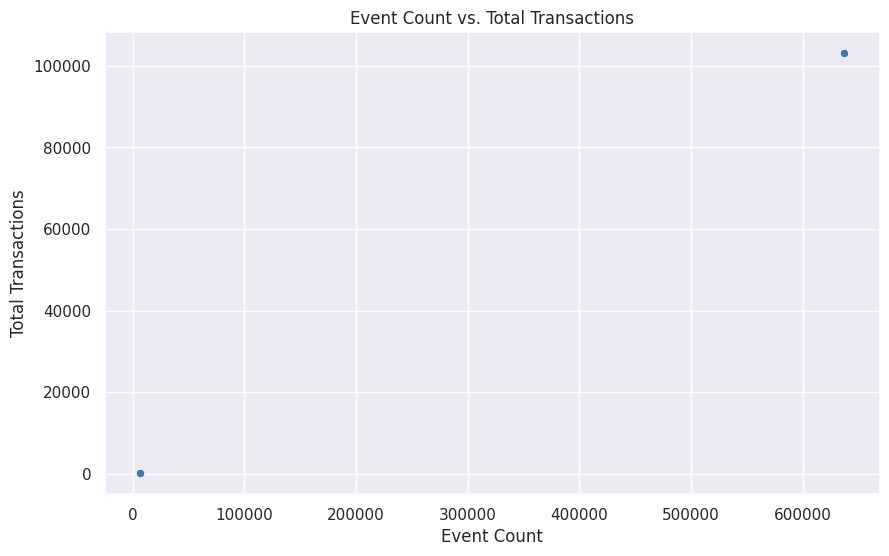

In [17]:
def visualize_common_events(df):
    """
    Identify and visualize the most common events and their contribution to conversions.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing session data.
    
    Returns:
    None
    """
    # Aggregate event counts and total transactions by event category
    event_stats = df.groupby('event_category').agg(
        event_count=('event_category', 'count'),
        total_transactions=('total_transactions', 'sum')
    ).reset_index()
    
    # Plot common events
    plt.figure(figsize=(12, 8))
    sns.barplot(x='event_count', y='event_category', data=event_stats.sort_values(by='event_count', ascending=False).head(10), palette='plasma')
    plt.title('Most Common Events')
    plt.xlabel('Event Count')
    plt.ylabel('Event Category')
    plt.show()
    
    # Plot events vs. total transactions
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='event_count', y='total_transactions', data=event_stats)
    plt.title('Event Count vs. Total Transactions')
    plt.xlabel('Event Count')
    plt.ylabel('Total Transactions')
    plt.show()


visualize_common_events(df)


In [37]:
 event_stats = df.groupby('event_category').agg(
        event_count=('event_category', 'count'),
        total_transactions=('total_transactions', 'sum')
    ).reset_index()
    
event_stats

,event_category,event_count,total_transactions
0,Contact Us,6348,108.0
1,Enhanced Ecommerce,637402,103095.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



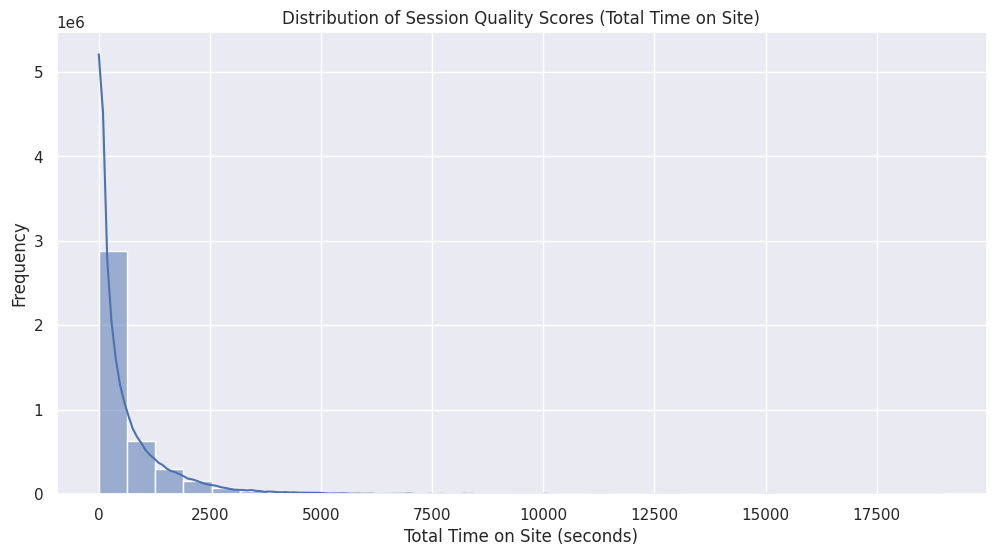

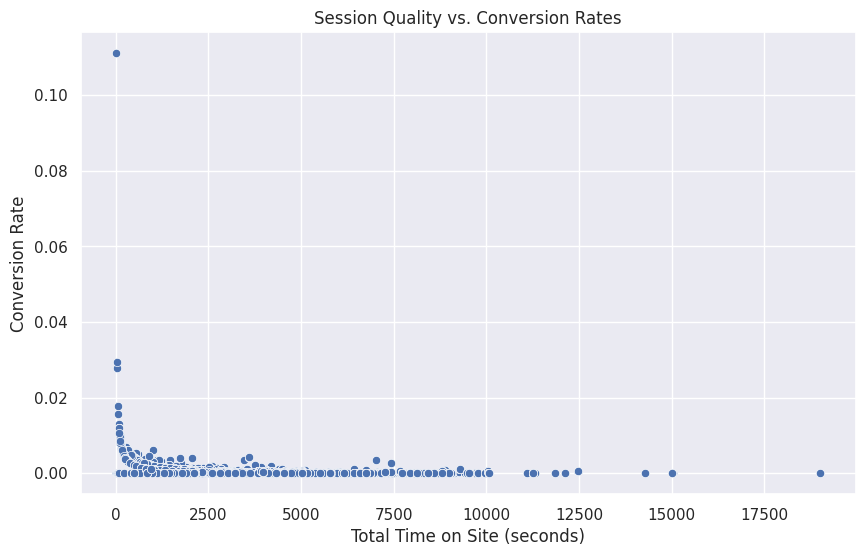

In [18]:
def visualize_session_quality_and_conversions(df):
    """
    Analyze and visualize the distribution of session quality scores and their relation to conversion rates.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing session data.
    
    Returns:
    None
    """
    # Assume session quality score is a metric that can be derived; here using total_time_on_site as a proxy
    session_quality = df[['total_time_on_site', 'total_transactions']].copy()
    session_quality['conversion_rate'] = session_quality['total_transactions'] / session_quality['total_time_on_site']
    
    # Plot distribution of session quality scores (proxy: total time on site)
    plt.figure(figsize=(12, 6))
    sns.histplot(session_quality['total_time_on_site'], bins=30, kde=True)
    plt.title('Distribution of Session Quality Scores (Total Time on Site)')
    plt.xlabel('Total Time on Site (seconds)')
    plt.ylabel('Frequency')
    plt.show()
    
    # Plot session quality vs. conversion rates
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='total_time_on_site', y='conversion_rate', data=session_quality)
    plt.title('Session Quality vs. Conversion Rates')
    plt.xlabel('Total Time on Site (seconds)')
    plt.ylabel('Conversion Rate')
    plt.show()


visualize_session_quality_and_conversions(df)
